In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import sklearn.model_selection as ms
import tensorflow as tf
from tensorflow import keras
import seaborn as sns 
from keras.backend import clear_session
from keras.utils import to_categorical

In [2]:
data = pd.read_csv('../../data_sets/fetal_health.csv')
data.sample(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1396,142.0,0.001,0.000,0.007,0.004,0.0,0.000,49.0,0.9,28.0,...,68.0,182.0,2.0,0.0,153.0,146.0,154.0,37.0,1.0,1.0
1664,106.0,0.000,0.000,0.009,0.000,0.0,0.000,64.0,0.6,0.0,...,102.0,122.0,1.0,0.0,111.0,111.0,112.0,0.0,0.0,1.0
1648,132.0,0.008,0.000,0.009,0.012,0.0,0.000,55.0,2.7,0.0,...,60.0,183.0,5.0,0.0,144.0,118.0,142.0,100.0,1.0,1.0
1150,122.0,0.008,0.000,0.000,0.002,0.0,0.000,24.0,1.6,0.0,...,79.0,157.0,3.0,0.0,136.0,127.0,131.0,21.0,1.0,1.0
14,130.0,0.006,0.408,0.004,0.005,0.0,0.001,21.0,2.3,0.0,...,67.0,174.0,7.0,0.0,143.0,125.0,135.0,76.0,0.0,1.0


In [4]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
data.info()

In [6]:
X = data.copy()
X.drop('fetal_health', axis=1, inplace=True)
y = data['fetal_health'].copy()

In [8]:
x_train,x_test, y_train, y_test = ms.train_test_split(X, y, stratify=y, random_state=42)
x_train,x_validation, y_train, y_validation = ms.train_test_split(x_train,y_train,stratify=y_train, random_state=42)

In [9]:
x_train.shape

(1195, 21)

In [10]:
#building the neural network model 
model = keras.models.Sequential([keras.layers.Input(shape=x_train.shape[1], name='input'), keras.layers.Dense(250, activation = 'relu'), keras.layers.Dense(125,activation = 'relu'), keras.layers.Dense(4, activation = 'softmax', name = 'output')])
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               5500      
                                                                 
 dense_1 (Dense)             (None, 125)               31375     
                                                                 
 output (Dense)              (None, 4)                 504       
                                                                 
Total params: 37,379
Trainable params: 37,379
Non-trainable params: 0
_________________________________________________________________


2022-04-02 14:02:17.908001: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation))

Epoch 1/30
38/38 [==============================] - 1s 5ms/step - loss: 57.5847 - accuracy: 0.6711 - val_loss: 1.0886 - val_accuracy: 0.7820
Epoch 2/30
38/38 [==============================] - 0s 2ms/step - loss: 0.9575 - accuracy: 0.7782 - val_loss: 0.8642 - val_accuracy: 0.7870
Epoch 3/30
38/38 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.7824 - val_loss: 0.8037 - val_accuracy: 0.7895
Epoch 4/30
38/38 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.7674 - val_loss: 0.7747 - val_accuracy: 0.7845
Epoch 5/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7875 - accuracy: 0.7791 - val_loss: 0.7315 - val_accuracy: 0.7845
Epoch 6/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.7833 - val_loss: 0.7001 - val_accuracy: 0.7970
Epoch 7/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7441 - accuracy: 0.7858 - val_loss: 0.7100 - val_accuracy: 0.7945
Epoch 8/30
38/38 [=

In [12]:
metrics_df = pd.DataFrame(history.history)
metrics_df.sample()

,loss,accuracy,val_loss,val_accuracy
12,0.688641,0.789121,0.659409,0.799499


In [14]:

print(f'Avg Training Accuracy: {round(metrics_df.accuracy.mean() * 100, 1)}')
print(f'Avg Validation Accuracy: {round(metrics_df.val_accuracy.mean() * 100, 1)}')

Avg Training Accuracy: 78.7
Avg Validation Accuracy: 80.5


(0.0, 1.0)

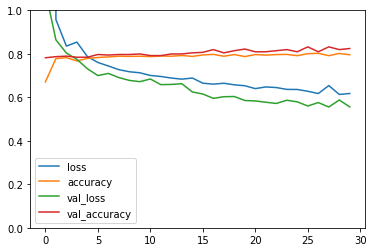

In [15]:
metrics_df.plot()
plt.ylim((0,1))

In [7]:
def compile_model():
    #clear_session()
    
    model = Sequential()
    
    model.add(Dense(20,input_shape=(20,), activation='relu'))
    model.add(Dense(20,activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(3, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= [AUC(multi_label=True)])
    return model 

In [8]:
model = compile_model()
the_model = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)
y_pred0 = model.predict(x_test)


def print_confusion_matrix(model,x_train,y_train,y_test,y_pred):
    train_confusion = confusion_matrix(np.argmax(y_train,axis=1), np.argmax(model.predict(x_train),axis=1))
    test_confusion = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))
    
    fig,aax = plt.subplots(1,2,figsize=(12,5))
    
    sns.heatmap(train_confusion/np.sum(train_confusion), ax=ax[0], annot= True, fmt='0.2%', cmap='Reds')
    ax[0].set_title('Confusion Matrix (Test Set)')
    ax[0].set_xlabel('Predicted Labels')
    ax[0].set_ylabel('Actual Labels')
    
print_confusion_matrix(model, x_train,y_train,y_test,y_pred0)

NameError: name 'Sequential' is not defined